# First Order Traditional Fuzzy Time Series method by Song & Chissom (1993)

Q. Song and B. S. Chissom, “Fuzzy time series and its models,” Fuzzy Sets Syst., vol. 54, no. 3, pp. 269–277, 1993.

# Common Imports

In [7]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import song

from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data Loading

In [8]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

# Exploring the partitioning effects on original data

In [9]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, song.ConventionalFTS, range(1,20), [1], tam=[10, 5])

IndexError: index 0 is out of bounds for axis 0 with size 0

# Exploring the partitioning effects on transformed data

In [10]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, song.ConventionalFTS, 
                              range(1,20), [1], transformation=diff, tam=[10, 5])

AttributeError: 'function' object has no attribute 'apply'

# Comparing the partitioning schemas

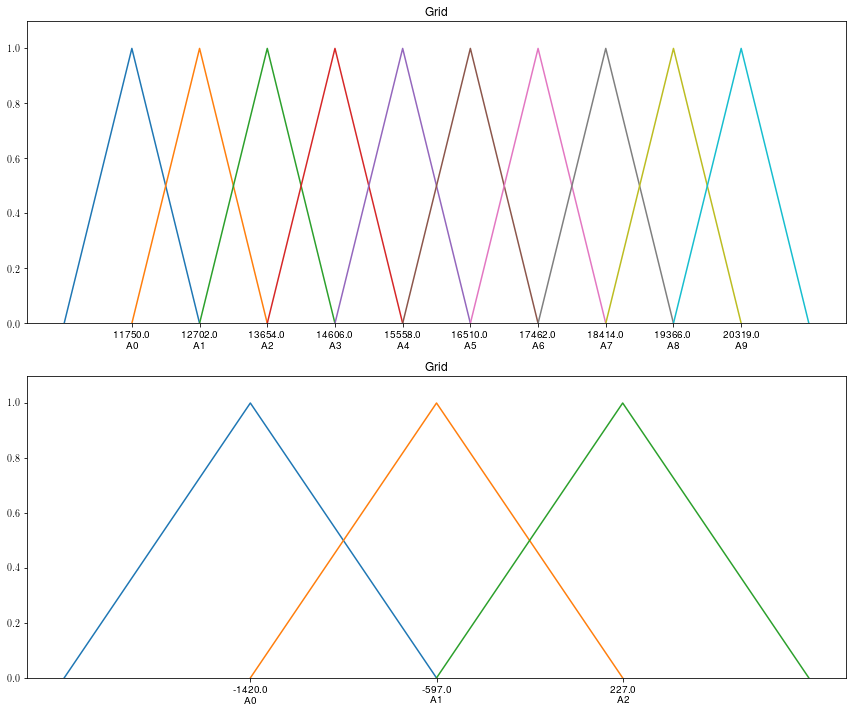

In [11]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(data=enrollments, npart=10)
fuzzy_sets2 = Grid.GridPartitioner(data=enrollments, npart=3, transformation=tdiff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

# Fitting a model on original data

In [12]:
model1 = song.ConventionalFTS("FTS", partitioner=fuzzy_sets)
model1.fit(enrollments)

print(model1)

[ 16:53:24] Start training
[ 16:53:24] Finish training
Traditional FTS:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.91046234e-15
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.91046234e-15 1.91046234e-15
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.

# Fitting a model on transformed data

In [13]:
model2 = song.ConventionalFTS("FTS Diff", partitioner=fuzzy_sets2)
model2.append_transformation(tdiff)
model2.fit(enrollments)

print(model2)

[ 16:53:40] Start training
[ 16:53:40] Finish training
Traditional FTS:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# Using the models

In [14]:
model1.predict(enrollments)

[12701.62,
 12701.62,
 12701.62,
 13177.68,
 13177.68,
 13177.68,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 13177.68,
 13177.68,
 13177.68,
 13177.68,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003,
 16034.040000000003]

In [15]:
model2.predict(enrollments)

[12458.433333333332,
 12966.433333333332,
 13270.433333333332,
 14099.433333333332,
 14863.433333333332,
 14714.433333333332,
 15006.433333333332,
 15264.433333333332,
 16210.433333333332,
 16322.433333333332,
 15791.433333333332,
 14836.433333333332,
 14900.433333333332,
 14548.433333333332,
 14566.433333333332,
 15387.433333333332,
 16262.433333333332,
 17553.433333333334,
 18373.433333333334,
 18731.433333333334,
 18740.433333333334,
 18279.433333333334]

# Comparing the models

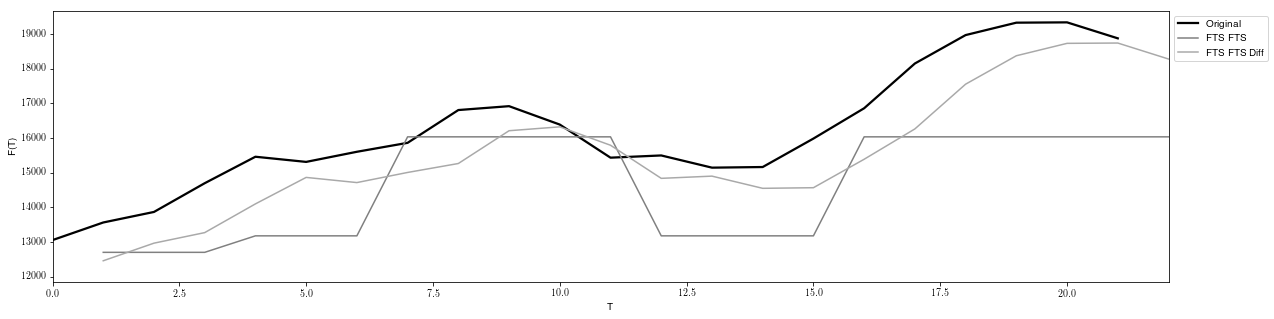

In [16]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, intervals=False)

In [17]:
bchmk.print_point_statistics(enrollments, [model1, model2])

Model		& Order     & RMSE		& SMAPE      & Theil's U		\\ 
FTS FTS		& 1		& 2050.52		& 5.86		& 3.19	\\ 
FTS FTS Diff		& 1		& 1036.56		& 2.9		& 1.69	\\ 



# Residual Analysis

In [ ]:
from pyFTS.benchmarks import ResidualAnalysis as ra

ra.plot_residuals(enrollments, [model1, model2])